<a href="https://colab.research.google.com/github/matsu323/LLM-drug-discovery/blob/main/LLMcharenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
!pip install rdkit-pypi
!pip install openai
!pip install pubchempy
import pubchempy as pcp

!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=4ed68daab0162e6a912a207cea34e2bed2a6d55cf863d9c5247e7dd6c3121c7c
  Stored in directory: 

In [8]:
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

In [3]:
sdf_file = '/content/CBLB_inhibitors_vsF.sdf'
suppl = Chem.SDMolSupplier(sdf_file)


# 分子をSMILES形式に変換する
molecules = []
for mol in suppl:
    if mol is not None:
        smiles = Chem.MolToSmiles(mol)
        molecules.append(smiles)
activity_scores=[]


In [176]:
no=[4,
20,
21,
45,
51,
52,
61,
64,
79,
109,
127,
132,
134,
167,
178,
184,
185,
256,
385,
404,
406,
408,
409,
417,
420,
423,
425,
469,
518,
519,
570,
571,
587,
588,
592,
594,
597,
599,
602,
613,
722,
819,
820,
823,
825,
831,
832,
834]

remol = [i for i in molecules if i not in n]

In [4]:
import random
index=[0]*10
for i in range(10):
  index[i]=random.randint(0,len(molecules)-1)
index=sorted(index)

In [163]:
index=[33,116,129,164,209,578,676,725,821,854]

In [164]:
smiles=[]
properties = ['IUPACName', 'CanonicalSMILES']
for i in range(10):
  smiles.append(pcp.get_properties(properties,molecules[index[i]],'smiles'))
l=[]
for i in range(10):
  l.append([smiles[i][0]['CanonicalSMILES'],smiles[i][0]['IUPACName']])
for i in range(10):
  print(l[i][0])

CC(C1=CC(=CC=C1)N2C=C(N=N2)C3=CC=C(C=C3)C(=O)NC)SC4=NN=CN4C
CN1C=NN=C1CC(C2=CC(=CC=C2)N3CC4=C(C3=O)C=CC=C4C(F)(F)F)C(F)(F)F
CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)C(=O)O
CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)N(C)C5CCNC5
CC(C1=CC(=CC=C1)N2CC3=C(C2=O)C=C(C=C3C(F)(F)F)C(=O)N4CC(C4)C(F)F)(C(C5=NN=CN5C)(F)F)F
CC(CC1=NN=CN1C)C2=CC(=CC=C2)NC(=O)C3=CC(=CC(=N3)C4CC4)C(=O)N5CCC(C5)O
CC1CCC2=C1NN=C2C(=O)NC3=CC=CC(=C3)C(C)CC4=NN=CN4C
CC(C1=CC(=CC=C1)NC(=O)N2CCS(=O)(=O)CC2)SC3=NN=CN3C
CC1CC(CN1C(=O)C2=CC(=NC=C2)C(=O)NC3=CC=CC(=C3)C(C)SC4=NN=CN4C)O
CC(C1=CC(=CC=C1)NC(=O)C2=NC3=CC=CC=C3C=C2)SC4=NN=CN4C


In [166]:
slist=['CC1=CC=C(C=C1)NC2=NC=C(N2)C3=CC=C(C=C3)C(=O)NC',
'CC(C1=CC(=CC=C1)N2C=C(N=N2)C3=CC(C=C3)C(=O)NC)SC4=NN=CN4C',
'CC1CCC2=C1NN=C2C(=O)NC3=CC=CC(=C3)C(C)CC4=NN=CN4C',
'CC(=O)NCC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N(C)C',
'CC(=O)NCC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N(C)C',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC(=O)N1CCN(CC1)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=CC(=C3)N(C)C']

In [156]:
error=[]
for i in range(len(slist)):
  try:
     mol= Chem.MolFromSmiles(slist[i])
     if mol is None :
      error.append(0)
     else:
      error.append(1)
  except:
    print(i)
print(error)

In [157]:
max=[]
for i in range(len(slist)):
  if i!=5:
    mol=Chem.MolFromSmiles(slist[i])
    m=[0,0,i]
    for j in range(len(molecules)):
      mol1=Chem.MolFromSmiles(molecules[j])
      fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
      fp2 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
      similarity = TanimotoSimilarity(fp1, fp2)
      if m[0]< similarity:
        m[0]=similarity
        m[1]=j
    max.append(m)

max


[[1.0, 79, 0], [1.0, 97, 1], [1.0, 461, 2], [1.0, 485, 3]]

In [13]:
# 提案化合物同士の類似度
for i in range(len(slist)):
  for j in range(i+1,len(slist)):
    mol1=Chem.MolFromSmiles(slist[i])
    mol2=Chem.MolFromSmiles(slist[j])
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)
    similarity = TanimotoSimilarity(fp1, fp2)
    if similarity>0.9:
      print(i,j,similarity)


In [15]:
max=0
a=[]

for i in range(len(molecules)-1):
  for j in range(i+1,len(molecules)-1):
    mol1 = Chem.MolFromSmiles(molecules[i])
    mol2 = Chem.MolFromSmiles(molecules[j])
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)
    similarity = TanimotoSimilarity(fp1, fp2)
    if similarity>=0.80:
      a.append([i,j,similarity])
print(a)


[[0, 1, 1.0], [2, 3, 1.0], [5, 6, 1.0], [5, 8, 0.8181818181818182], [5, 9, 0.8333333333333334], [5, 12, 0.8035714285714286], [5, 18, 0.8070175438596491], [5, 19, 0.8070175438596491], [6, 8, 0.8181818181818182], [6, 9, 0.8333333333333334], [6, 12, 0.8035714285714286], [6, 18, 0.8070175438596491], [6, 19, 0.8070175438596491], [8, 9, 0.8392857142857143], [10, 11, 0.847457627118644], [12, 13, 0.8448275862068966], [14, 15, 0.864406779661017], [14, 16, 0.8360655737704918], [14, 18, 0.864406779661017], [15, 17, 0.8360655737704918], [15, 19, 0.864406779661017], [16, 17, 0.8688524590163934], [16, 18, 0.8360655737704918], [17, 19, 0.8360655737704918], [18, 19, 0.864406779661017], [21, 24, 0.8035714285714286], [21, 26, 0.8181818181818182], [21, 27, 0.8333333333333334], [21, 34, 0.8070175438596491], [21, 35, 0.8070175438596491], [22, 23, 0.8620689655172413], [24, 25, 0.8448275862068966], [26, 27, 0.8392857142857143], [28, 29, 0.847457627118644], [30, 31, 0.864406779661017], [30, 32, 0.836065573770

In [35]:
index=random.randint(0,len(molecules)-1)
index

461

In [93]:
index=[461]
for i in range(19):
  min=[0,1]
  for j in range(len(molecules)):
    tmp=0
    fp1=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[j]), 2, nBits=1024)
    for k in range(len(index)):
      fp2=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[k]]), 2, nBits=1024)
      sim=TanimotoSimilarity(fp1, fp2)
      if sim>tmp:
        tmp=sim
    if min[1]>tmp:
      min=[j,tmp]
  index.append(min[0]) 
      


In [137]:
index=sorted(index)

In [167]:
# smiles=[]
mols=[]
for i in range(len(slist)):
  # smiles.append(molecules[index[i]])
  mols.append(Chem.MolFromSmiles(slist[i]))

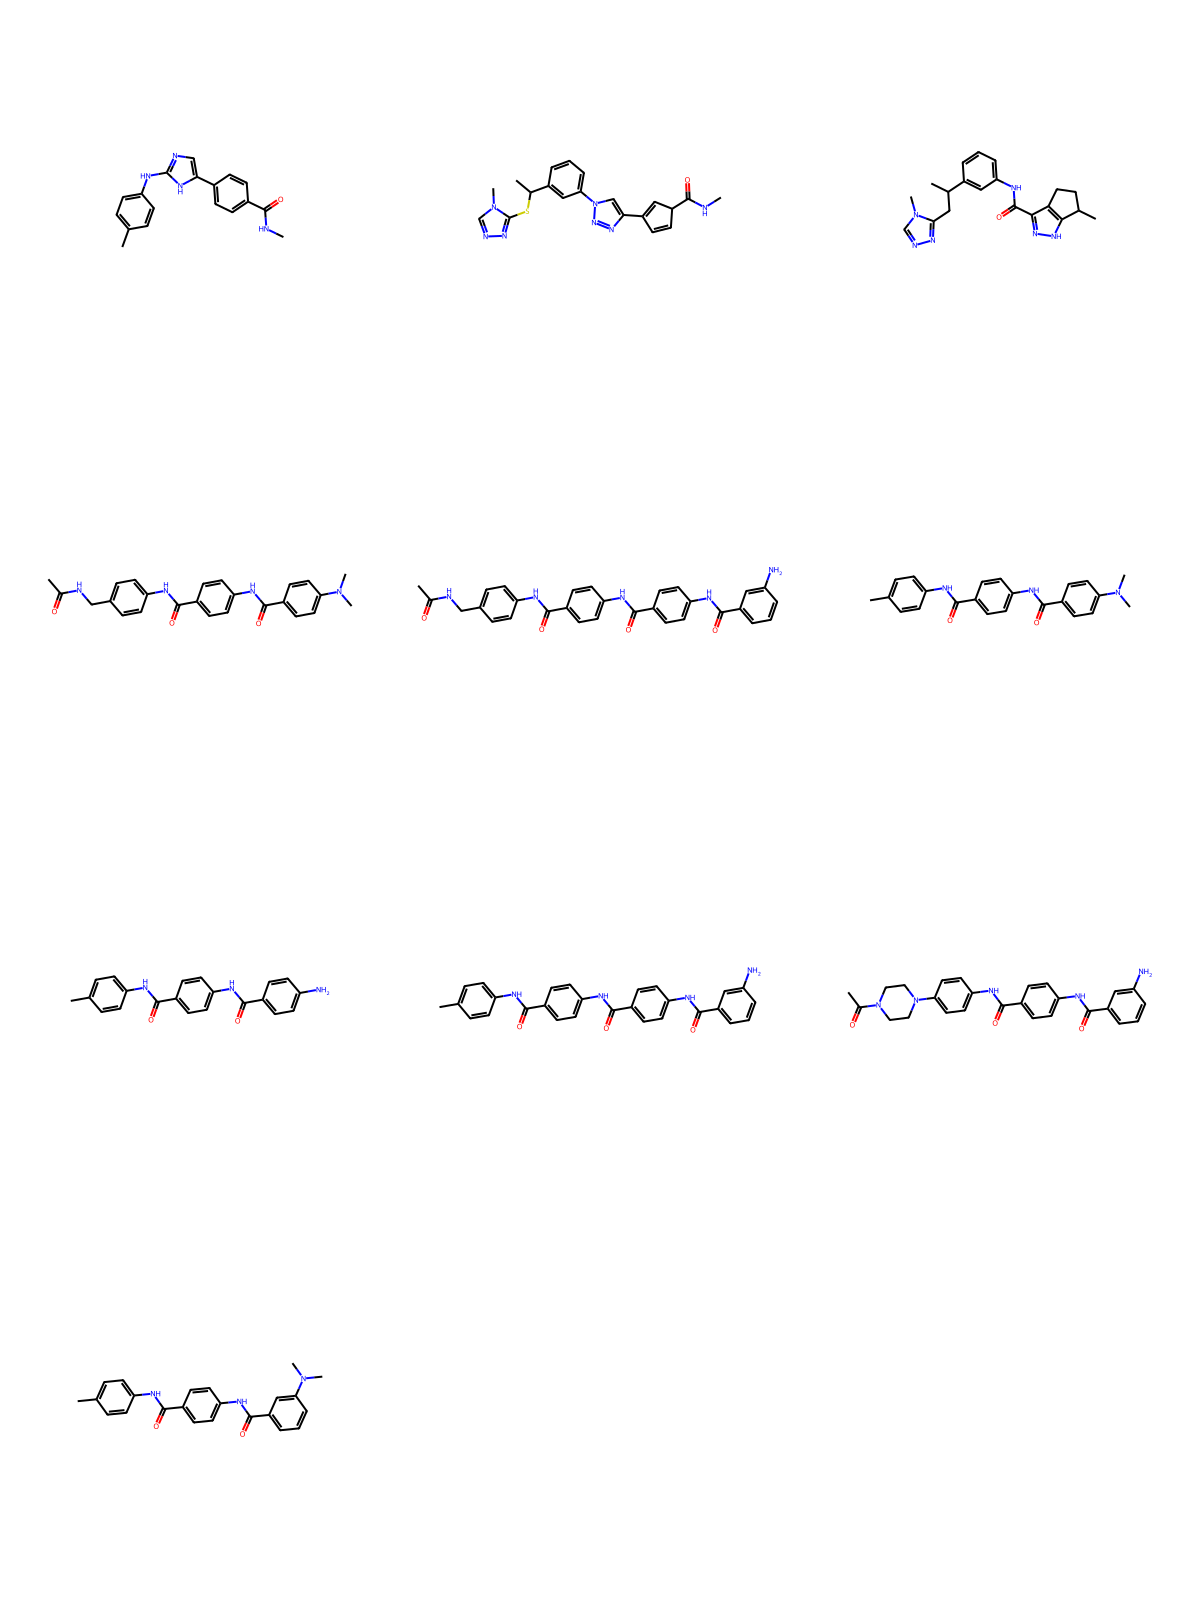

In [168]:
from rdkit.Chem import Draw 
index=[20,58,79,97,408,439,461,471,485,517,616,624,630,659,669,684,737,797,873,892]
# m=Chem.MolFromSmiles(molecules[20])
# m
Draw.MolsToGridImage(mols,subImgSize=(400,400))

In [158]:
for i in range(len(index)):
  fp1=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[i]]), 2, nBits=1024)
  for j in range(i+1,len(index)):
    fp2=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[j]]), 2, nBits=1024)
    # print(i,j,TanimotoSimilarity(fp1, fp2))


In [161]:
csmiles=[]
for i in range(len(index)):
  csmiles.append(Chem.MolToSmiles(mols[i]))
csmiles

['C[C@H](Sc1nncn1C)c1ccnc(-n2ncc(-c3ccccc3)n2)c1',
 'C[C@H](Cc1nncn1C)c1cccc(-c2n[nH]c3cc(C4CCC4)cnc23)c1',
 'Cn1cnnc1CC1(c2cccc(NC(=O)N3C[C@@]4(CCNC4)Oc4cccnc43)c2)COC1',
 'CC(c1cc2c(c(C3CC3)n1)CN(c1cccc(C3(Cc4nncn4C)COC3)c1)C2=O)N1CCCCC1',
 'CN1C[C@H]2C[C@H]1CN2c1cc2c(c(C(F)(F)F)c1)CN(c1cccc([C@@](C)(F)C(F)(F)c3nncn3C)c1)C2=O',
 'C[C@H](Cc1nncn1C)c1cc(-c2cncs2)nc(N2Cc3c(cccc3C(F)(F)F)C2=O)c1',
 'Cc1conc1CC1(c2cccc(N3Cc4c(cc(CN5CCC6(CC6)C5)cc4C(F)(F)F)C3=O)c2)COC1',
 'C[C@H](Cc1n[nH]cc1C(F)(F)F)c1cccc(N2Cc3c(cc(C(=O)N4CC[C@H](O)C4)cc3C(F)(F)F)C2=O)c1',
 'CC(Sc1nncn1C)c1cccc(N2Cc3ccc(C(C)(C)O)cc3C2=O)c1',
 'Cc1ccc(C(=O)Nc2cccc([C@H](C)[C@H](O)c3nncn3C)c2)nc1C1CC1',
 'CCOc1cc([C@@](C)(F)C(F)(F)c2nncn2C)cc(NC(=O)c2cc(C)nc(C3CC3)n2)n1',
 'Cc1cc(C(=O)Nc2cccc(C3(Cc4n[nH]cc4C)COC3)c2)nc(C2CC2)n1',
 'C[C@H](Cc1nccn1C)c1cccc(NC(=O)c2cc(C(=O)N3C[C@@H](O)C[C@H]3C)ccn2)c1',
 'Cn1cnnc1[C@@H]1C[C@@H]1c1cccc(NC(=O)c2nc3cccc(C(F)(F)F)c3[nH]2)c1',
 'CNC(=O)C1(C(F)(F)F)CCN(C(=O)Nc2cccc([C@H](C)Cc3nncn3

In [171]:
smiles=[]
properties = ['IUPACName', 'CanonicalSMILES']
for i in range(10):
  smiles.append(pcp.get_properties(properties,csmiles[i],'smiles'))
l=[]
# for i in range(10):
#   l.append([smiles[i][0]['CanonicalSMILES'],smiles[i][0]['IUPACName']])
# for i in range(10):
#   print(l[i][0])

In [173]:
aaa=[]
properties = ['IUPACName', 'CanonicalSMILES']
for i in range(len(molecules)):
  aaa.append(pcp.get_properties(properties,molecules[i],'smiles'))
error=[]
l=[]
for i in range(len(molecules)):
  try:
     mol=[aaa[i][0]['CanonicalSMILES'],aaa[i][0]['IUPACName']]
     if mol is None :
      error.append(i)
     else:
      l.append(mol[0])
  except:
    print(i)

4
20
21
45
51
52
61
64
79
109
127
132
134
167
178
184
185
256
385
404
406
408
409
417
420
423
425
469
518
519
570
571
587
588
592
594
597
599
602
613
722
819
820
823
825
831
832
834


In [175]:
print(len(l))

847


In [180]:
n=[]
for i in range(len(no)):
  n.append(molecules[no[i]])